# 1. Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import pickle

# 2. Load and Explore the Dataset

In [2]:
file_path = r'E:\2_iris_project\IRIS.csv'
iris_df = pd.read_csv(file_path)

# 3. Exploratory Data Analysis (EDA)

C:\Users\nidhi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


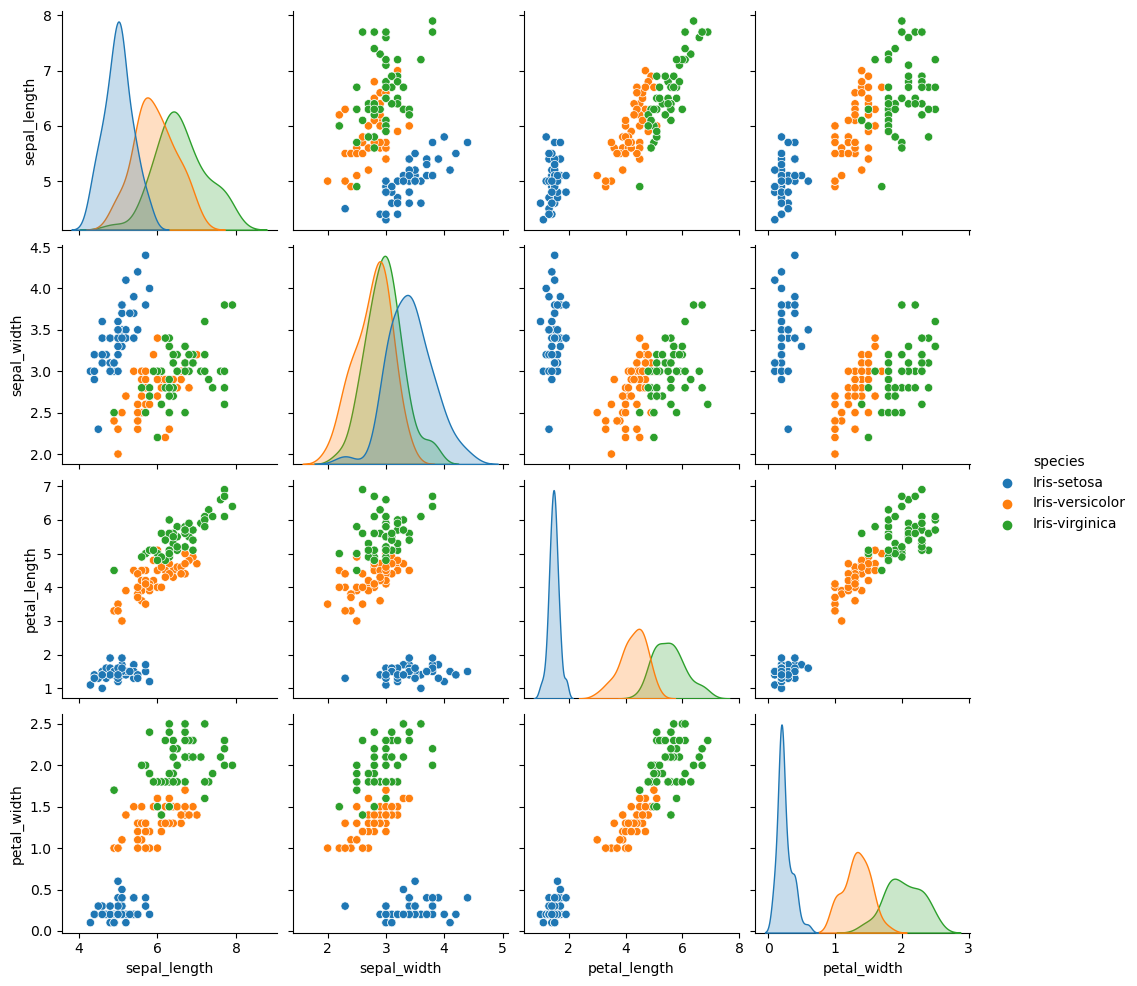

In [3]:
sns.pairplot(iris_df, hue='species')
plt.show()

C:\Users\nidhi\AppData\Local\Temp\ipykernel_2488\2238251313.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')


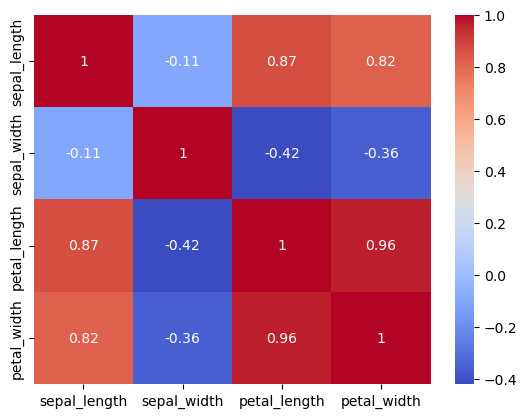

In [4]:
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# 4. Data Preprocessing

In [5]:
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [6]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 5. Model Building and Evaluation (SVM)


In [9]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [10]:
y_pred = svm_model.predict(X_test)

In [11]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.97
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



# 6. Model Optimization (GridSearchCV)

In [12]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             verbose=1)

In [13]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'C': 10, 'kernel': 'linear'}
Best score: 0.9583333333333334


# 7. Model Comparison (Random Forest)

In [14]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [15]:
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Accuracy: 1.00


# 8. Dimensionality Reduction (PCA)

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

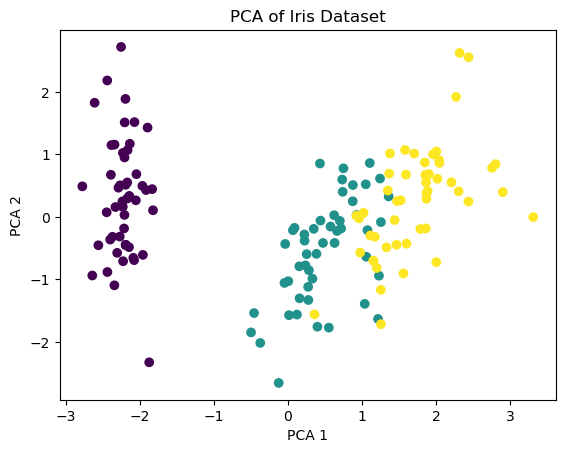

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Iris Dataset')
plt.show()

# 9. Save Models with Pickle

In [18]:
with open('svm_iris_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Test the loaded model

In [19]:
with open('svm_iris_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [20]:
y_pred_loaded = loaded_model.predict(X_test)
print(f"Accuracy of loaded model: {accuracy_score(y_test, y_pred_loaded):.2f}")

Accuracy of loaded model: 0.97


Confusion Matrix Visualization

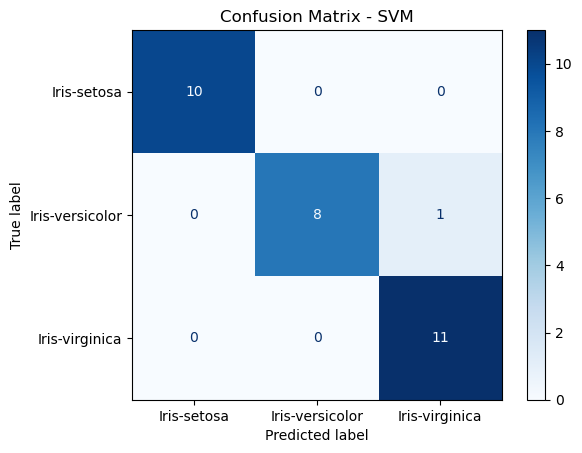

In [21]:
cm_svm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=label_encoder.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

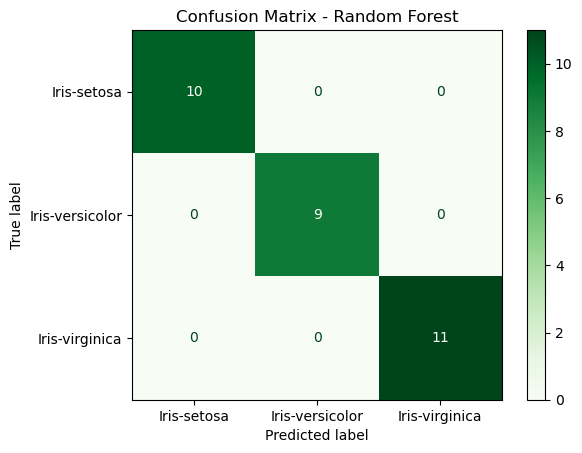

In [22]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder.classes_).plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()